# Machine Learning: K-means Clustering on Gene Expression Data
**************
* The dataset has 400 genes with 2 expressions each
* Explore the data via k-mean clustering
***********
1. Develop a k-means algorithm
    * choose x number of cluster centers and choose x random points to be the centers
    * assign points to closest center
    * re-evaluate cluster centers using the equation $$\mu_i^{'} = \frac{1}{C_i} \sum_{x \in C_i}x$$
    * re-assign points closest to cluster centers
    * terminate iteration process once no new point assignments

2. Implement a function that computes the sum of squared errors (SSE) given by the function: 
$$SSE = \sum_{i=1}^K \sum_{x \in C_i} ||x - \mu_i||_2^2$$
where $C_i$ is cluster $i$ and $\mu_i$ is the center of cluster $C_i$.

3. Implement k-means algorithm on genome dataset for different values of K (different numbers of clusters). Run the algorithm a multitude of times, record the final SSE values, plot those values against changing K values, and determine a proper number of clusters for the dataset. 

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
#Make a pandas dataframe of genome data 
gene_df = pd.read_csv("data.txt", delim_whitespace = True, names = ["trait 1", "trait 2"])
gene_df

,trait 1,trait 2
0,0.174192,-1.565947
1,0.398956,0.572822
2,0.197047,-2.202261
3,-1.192469,0.826721
4,0.766692,-2.188980
...,...,...
395,9.847367,-10.601757
396,9.061822,-9.412264
397,8.690676,-10.504675
398,6.695525,-13.597586


In [16]:
#matrix of gene attributes, asking for number of clusters, pick initial centers

matrix = gene_df.to_numpy() #convert dataframe to numpy matrix

center_num = int(input("Pick the number of clusters: ")) #user input to specify number of clusters

index = list(np.random.choice(matrix.shape[0], center_num, replace = False)) #choose x number of random indices from matrix (based on user input)
center_start = [] 
for i in index: #append the elements of matrix to center_start from index
    center_start.append(matrix[i].tolist())
center_start = np.asarray(center_start)

Pick the number of clusters: 4


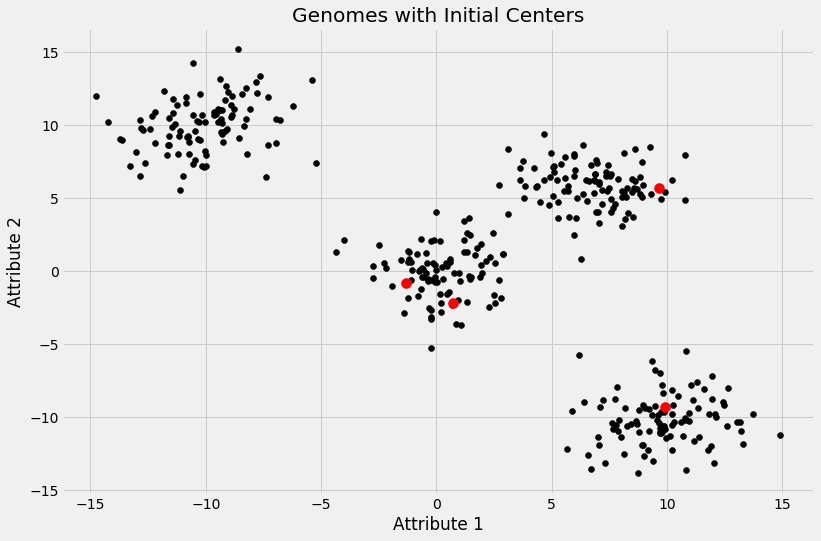

In [17]:
#plot genome points with initial centers

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.title('Genomes with Initial Centers')
plt.xlabel('Attribute 1'), plt.ylabel('Attribute 2')
plt.scatter(matrix[:,0], matrix[:,1], color='black')
plt.scatter(center_start[:,0], center_start[:,1], color='red', s=100, marker='o')

In [18]:
#create a dictionary for cluster centers and clusters. Assign points to clusters based on initial cluster centers

cluster_centers = {}
for i in index:
    cluster_centers[i] = matrix[i].tolist()

clusters = {cluster_index:[] for cluster_index in index} #a dictionary where a list of points closest to a cluster can be tied to cluster center

for i in matrix: #for every point in dataset
    distances = {} #dictionary where key is cluster center and the value is the distance between the cluster center and point i
    for j in index: #for each element in the list of indices of cluster centers
        distance = math.sqrt((i[0] - matrix[j][0])**2 + (i[1] - matrix[j][1])**2) #euclidean distance metric
        distances[j] = distance #adds key j and value distance to distances dictionary
    minimum_key = min(distances.keys(), key=(lambda k: distances[k])) #finds the key with the minimum value
    minimum_value = distances.get(minimum_key) #finds the value associated with minimum key
    clusters[minimum_key].append(list(i)) #append point i to the cluster center it is closest to

print ('initial cluster centers: \n\n', cluster_centers, '\n\ninitial clusters: \n')
clusters

initial cluster centers: 

 {93: [0.7089798851473063, -2.19598229251788], 357: [9.908271601168613, -9.349320724016199], 126: [9.638627028671033, 5.7361578232388934], 80: [-1.3076010949943246, -0.8023337425246749]} 

initial clusters: 



{93: [[0.17419196145163526, -1.5659469034171598],
  [0.1970467356977733, -2.202261488064681],
  [0.7666920831722069, -2.188980425419465],
  [2.2758826897758917, -2.4761854454768937],
  [2.894480726402388, 1.1449462012147933],
  [2.5472274730123785, -2.179208059786824],
  [2.5318803329323174, 0.5417128196623034],
  [-0.2382901378696531, -2.6747228917953407],
  [2.8798234747834317, 1.1819215094173408],
  [2.5119734659888526, -1.6682534217202611],
  [2.8205548361699377, -1.8738345692561504],
  [1.50971473446731, -0.43388164708878335],
  [0.4731991489711093, -1.57297874569365],
  [1.6910394936994932, 1.0976952728031777],
  [2.7159838262894813, -0.6041602256526231],
  [2.327978207960676, 0.9426273572460308],
  [-0.3228508541282376, -2.5576261969174907],
  [1.0220201472634551, -0.6555901785563212],
  [0.7695142615722448, -0.10048889665201703],
  [0.689228533926012, -2.323101998204091],
  [2.176316685724637, 0.6604387043642351],
  [0.8667135583998565, -3.6582253316551765],
  [1.47358457106941

In [19]:
#function for computing cluster centers

def center(points): #have points be a numpy 2d array
    total_sum_x = 0 #sum of all x coordinates
    total_sum_y = 0 #sum of all y coordinates
    for i in points:
        x = i[0]
        y = i[1]
        total_sum_x += x
        total_sum_y += y
    avg_sum_x = (1/len(points))*total_sum_x #average of all x values
    avg_sum_y = (1/len(points))*total_sum_y #average of all y values
    return [avg_sum_x, avg_sum_y]

In [20]:
#Compute new center of each cluster. Reassign points to new clusters based on cluster centers. Continue this process until no more changes.

while 1 == True: #always continue while loop until broken
    terminate = 0 #if this is not 0 we terminate process
    for cen in cluster_centers: #compute new center for each cluster
        cluster_centers[cen] = center(clusters[cen])
    sort = sorted(clusters.keys()) #dictionaries are unsorted. This sorts clusters so we can enumerate it
    for i,v in enumerate(sort): #i is the index of clusters element, v is the element
        new_sort = sort.copy()
        new_sort.remove(v) #sorted clusters without the cluster we are looking at
        for value in clusters[v]: #for each point in the cluster we are looking at
            distance_old = math.sqrt((cluster_centers[sort[i]][0] - value[0])**2 + (cluster_centers[sort[i]][1] - value[1])**2) #find distance between cluster point and its center
            distance_other = {} #holds the distances between the point we are looking at and the other cluster centers
            for w in new_sort: #we can look at the other cluster centers
                distance = math.sqrt((cluster_centers[w][0] - value[0])**2 + (cluster_centers[w][1] - value[1])**2) #distance between point we are looking at and other cluster centers
                distance_other[w] = distance #add to distance_other dictionary
                minimum_key = min(distance_other.keys(), key=(lambda k: distance_other[k])) #finds dictionary key associate with smallest distance value
                distance_new = distance_other.get(minimum_key) #finds value of smallest distance key
            if distance_new < distance_old: #if the point we are looking at is closer to another cluster center, move it to that cluster
                clusters[minimum_key].append(value)
                clusters[v].remove(value)
                terminate += 1 #if this condition is not met, terminate=0 and the while loop breaks
    if terminate == False:
        break
        
clusters


{93: [[0.17419196145163526, -1.5659469034171598],
  [0.1970467356977733, -2.202261488064681],
  [0.7666920831722069, -2.188980425419465],
  [2.2758826897758917, -2.4761854454768937],
  [2.894480726402388, 1.1449462012147933],
  [2.5472274730123785, -2.179208059786824],
  [2.5318803329323174, 0.5417128196623034],
  [-0.2382901378696531, -2.6747228917953407],
  [2.8798234747834317, 1.1819215094173408],
  [2.5119734659888526, -1.6682534217202611],
  [2.8205548361699377, -1.8738345692561504],
  [1.50971473446731, -0.43388164708878335],
  [0.4731991489711093, -1.57297874569365],
  [1.6910394936994932, 1.0976952728031777],
  [2.7159838262894813, -0.6041602256526231],
  [2.327978207960676, 0.9426273572460308],
  [-0.3228508541282376, -2.5576261969174907],
  [1.0220201472634551, -0.6555901785563212],
  [0.7695142615722448, -0.10048889665201703],
  [0.689228533926012, -2.323101998204091],
  [2.176316685724637, 0.6604387043642351],
  [0.8667135583998565, -3.6582253316551765],
  [1.47358457106941

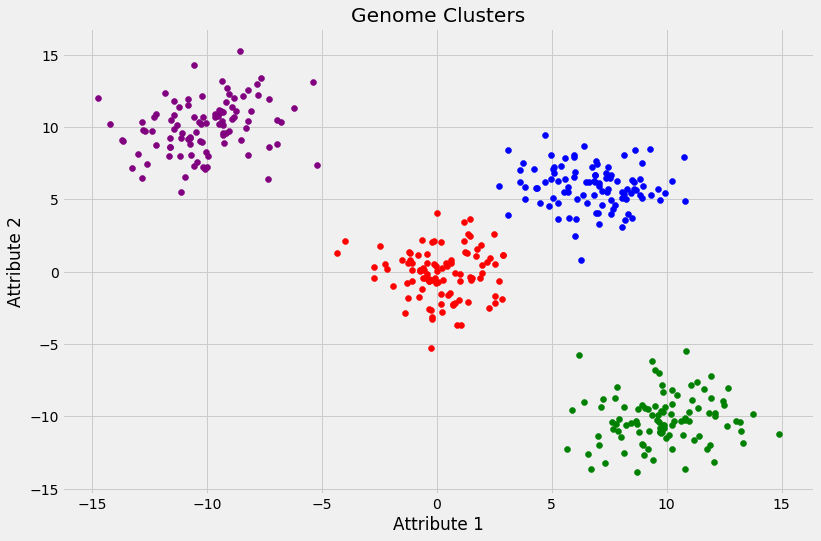

In [21]:
#plot our clusters

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.title('Genome Clusters')
plt.xlabel('Attribute 1'), plt.ylabel('Attribute 2')

colors = ['red', 'green', 'blue', 'purple', 'orange', 'black', 'cyan', 'yellow', 'magenta', 'burlywood', 'chartreuse']
color = 0
for i in clusters:
    xs = []
    ys = []
    for j in clusters[i]:
        xs.append(j[0])
        ys.append(j[1])
    plt.scatter(xs, ys, c = colors[color])
    color += 1
plt.show()

In [5]:
#function for computing sum of squared errors for a cluster relative to a cluster center
def SSE(pointset, center):
    e = 0
    for i in pointset:
        distance_sqr = (i[0] - center[0])**2 + (i[1] - center[1])**2 #euclidean distance metric
        e += distance_sqr
    return e

find total SSE on our clusters
total_SSE = 0
for i in cluster_centers:
    sse = SSE(clusters[i], cluster_centers[i])
    total_SSE += sse
print('sum of squared errors: ', total_SSE)

In [14]:
#Given a range of number of clusters and iterations of the algorithm, plot the average SSE value for each number of clusters

iterations = int(input('How many iterations should each number of clusters have? '))
cluster_num = int(input('Through what number of clusters should we test this on? '))

num_list = [] #ex. 1,1,1,2,2,2,3,3,3 how many clusters do we want each time we run algorithm
for i in range(cluster_num):
    for j in range(iterations):
        num_list.append(i+1)

sse_dict = {(i+1):[] for i in range(cluster_num)} #dictionary of number of different clusters and their average SSE value

for I in num_list:
    
    index = list(np.random.choice(matrix.shape[0], cluster_num, replace = False)) #choose x number of random indices from matrix (based on user input)
    center_start = [] 
    for i in index: #append the elements of matrix to center_start from index
        center_start.append(matrix[i].tolist())
    center_start = np.asarray(center_start)
    
    cluster_centers = {}
    for i in index:
        cluster_centers[i] = matrix[i].tolist()

    clusters = {cluster_index:[] for cluster_index in index} #a dictionary where a list of points closest to a cluster can be tied to cluster center

    for i in matrix: #for every point in dataset
        distances = {} #dictionary where key is cluster center and the value is the distance between the cluster center and point i
        for j in index: #for each element in the list of indices of cluster centers
            distance = math.sqrt((i[0] - matrix[j][0])**2 + (i[1] - matrix[j][1])**2) #euclidean distance metric
            distances[j] = distance #adds key j and value distance to distances dictionary
        minimum_key = min(distances.keys(), key=(lambda k: distances[k])) #finds the key with the minimum value
        minimum_value = distances.get(minimum_key) #finds the value associated with minimum key
        clusters[minimum_key].append(list(i)) #append point i to the cluster center it is closest to
        
    while 1 == True: #always continue while loop until broken
        terminate = 0 #if this is not 0 we terminate process
        for cen in cluster_centers: #compute new center for each cluster
            cluster_centers[cen] = center(clusters[cen])
        sort = sorted(clusters.keys()) #dictionaries are unsorted. This sorts clusters so we can enumerate it
        for i,v in enumerate(sort): #i is the index of clusters element, v is the element
            new_sort = sort.copy()
            new_sort.remove(v) #sorted clusters without the cluster we are looking at
            for value in clusters[v]: #for each point in the cluster we are looking at
                distance_old = math.sqrt((cluster_centers[sort[i]][0] - value[0])**2 + (cluster_centers[sort[i]][1] - value[1])**2) #find distance between cluster point and its center
                distance_other = {} #holds the distances between the point we are looking at and the other cluster centers
                for w in new_sort: #we can look at the other cluster centers
                    distance = math.sqrt((cluster_centers[w][0] - value[0])**2 + (cluster_centers[w][1] - value[1])**2) #distance between point we are looking at and other cluster centers
                    distance_other[w] = distance #add to distance_other dictionary
                    minimum_key = min(distance_other.keys(), key=(lambda k: distance_other[k])) #finds dictionary key associate with smallest distance value
                    distance_new = distance_other.get(minimum_key) #finds value of smallest distance key
                if distance_new < distance_old: #if the point we are looking at is closer to another cluster center, move it to that cluster
                    clusters[minimum_key].append(value)
                    clusters[v].remove(value)
                    terminate += 1 #if this condition is not met, terminate=0 and the while loop breaks
        if terminate == False:
            break
    
    total_SSE = 0 #sum of SSE of each cluster
    for i in cluster_centers: #compute SSE of each cluster
        sse = SSE(clusters[i], cluster_centers[i])
        total_SSE += sse
    
    sse_dict[I].append(total_SSE) 
    
for i in sse_dict: #make dictionary the average of each total SSE
    sse_sum = 0
    for j in sse_dict[i]:
        sse_sum += j
    avg = sse_sum/(iterations)
    sse_dict[i] = avg

print('\nThe average SSE over', iterations, 'iterations per number of clusters:')
sse_dict

How many iterations should each number of clusters have? 35
Through what number of clusters should we test this on? 6

The average SSE over 35 iterations per number of clusters:


{1: 2031.61941034808,
 2: 1934.6777358452182,
 3: 2143.7023703583905,
 4: 2242.1816669615373,
 5: 2152.225370781918,
 6: 2464.391164189015}

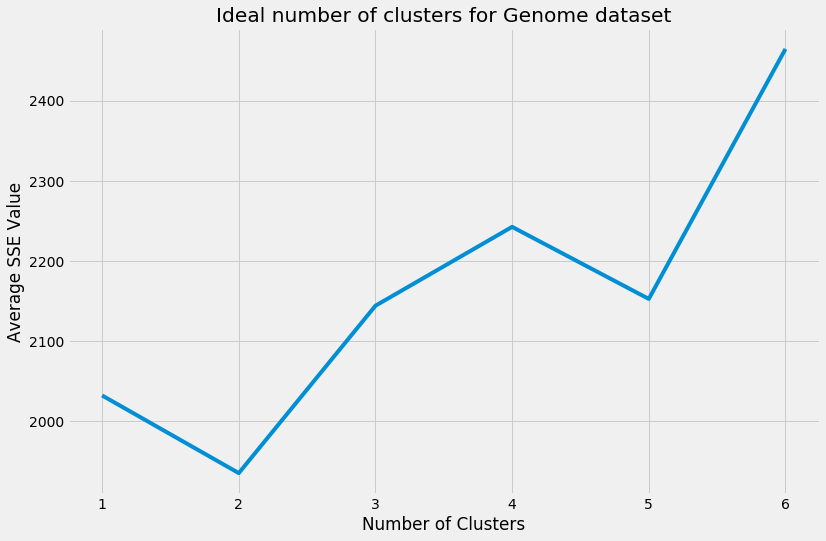

In [15]:
#plot average SSE over each cluster number

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.title('Ideal number of clusters for Genome dataset')
plt.xlabel('Number of Clusters'), plt.ylabel('Average SSE Value')

graph_array = np.array(list(sse_dict.items()))

plt.plot(graph_array[:,0], graph_array[:,1])